Please, contact python@nextnano.com for any issue with this example.

In [1]:
import nextnanopy as nn

In [2]:
# useful imports
import sys,os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
folder_nnp = r'E:\junliang.wang\datafiles\nextnano++'
folder_nn3 = r'E:\junliang.wang\datafiles\nextnano3'

# Load simulation files from nextnano

Any data file can be loaded via nextnanopy.Datafile class where the argument is the path to the data file. 

## Method 1: specifying the nextnano type (recommended)

For example, df = Datafile('mydatafolder\bandedges.dat', type='nextnano++') # types can be 'nextnano++', 'nextnano3' or 'nextnano.NEGF'

This class will check automatically how to load the datafile(1D, 2D, 3D, AVS, Ascii, etc) and will extract all the information (coordinates and variables with their information like name and units).

## Method 2: automatic detection of type (not recommended)

For example, df = Datafile('mydatafolder\bandedges.dat')

Similar than the above method, but you can omit the argument 'type' (type=None). If you do so, it will try to detect the type (nextnano++, nextnano3, nextnano.NEGF) and load the datafile with the optimum loader.

Note that with this method, it is not garanteed that the loaded data structure is correct since there can be unresolved conflicts.




# nextnano++ 1D example

In [6]:
file = os.path.join(folder_nnp,'bandedges_1d.dat') 
df = nn.DataFile(file,type='nextnano++') # You can omit type, but it is not recommended
print(df)

## Get coordinate information
The information is stored in Coord objects in the attribute .coords

Coord objects contains information about:
- name (str)
- value (np.array)
- unit (str)
- dim (int)
- label (str, optional)
- metadata (dict, if there is any)

In [7]:
print(f"List of coordinates in the current datafile: {df.coords}")
print(f"Get coord 'x' (by key): {df.coords['x']}")
print(f"Get coord 'x' (by index): {df.coords[0]}")
print(f"coord 'x' - name: {df.coords['x'].name}")
if False:
    print(f"coord 'x' - value: {df.coords['x'].value}")
print(f"coord 'x' - value (shape): {df.coords['x'].value.shape}")
print(f"coord 'x' - unit: {df.coords['x'].unit}")
print(f"coord 'x' - dim: {df.coords['x'].dim}")
print(f"coord 'x' - label: {df.coords['x'].label}")
print(f"coord 'x' - metadata: {df.coords['x'].metadata}")

List of coordinates in the current datafile: DictList([
(0,'x',Coord("x",...))
])
Get coord 'x' (by key): Coord("x",...)
Get coord 'x' (by index): Coord("x",...)
coord 'x' - name: x
coord 'x' - value (shape): (548,)
coord 'x' - unit: nm
coord 'x' - dim: 0
coord 'x' - label: 
coord 'x' - metadata: {}


## Get variables information (simulated data)
The information is stored in Variable objects in the attribute .variables

Variable objects contains information about:
- name (str)
- value (np.array)
- unit (str)
- label (str, optional)
- metadata (dict, if there is any)

In [8]:
print(f"List of variables in the current datafile: {df.variables}")
key = 'Gamma'
print(f"Get variables '{key}' (by key): {df.variables[key]}")
print(f"Get variables '{key}' (by index): {df.variables[0]}")
print(f"variables '{key}' - name: {df.variables[key].name}")
if False:
    print(f"variables '{key}' - value: {df.variables[key].value}")
print(f"variables '{key}' - value (shape): {df.variables[key].value.shape}")
print(f"variables '{key}' - unit: {df.variables[key].unit}")
print(f"variables '{key}' - label: {df.variables[key].label}")
print(f"variables '{key}' - metadata: {df.variables[key].metadata}")

List of variables in the current datafile: DictList([
(0,'Gamma',Variable("Gamma",...)),
(1,'HH',Variable("HH",...)),
(2,'electron_Fermi_level',Variable("electron_Fermi_level",...)),
(3,'hole_Fermi_level',Variable("hole_Fermi_level",...))
])
Get variables 'Gamma' (by key): Variable("Gamma",...)
Get variables 'Gamma' (by index): Variable("Gamma",...)
variables 'Gamma' - name: Gamma
variables 'Gamma' - value (shape): (548,)
variables 'Gamma' - unit: eV
variables 'Gamma' - label: 
variables 'Gamma' - metadata: {}


## Simple plot of bandedge and the electron fermi level

<IPython.core.display.Javascript object>


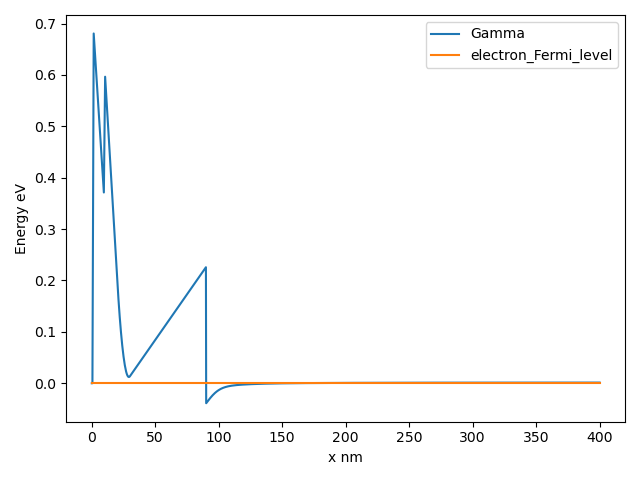

In [9]:
fig, ax = plt.subplots(1)
ax.plot(df.coords['x'].value,df.variables['Gamma'].value,label='Gamma')
ax.plot(df.coords['x'].value,df.variables['electron_Fermi_level'].value, label='electron_Fermi_level')

ax.set_xlabel(f"{df.coords['x'].name} {df.coords['x'].unit}")
ax.set_ylabel(f"Energy {df.variables['Gamma'].unit}")
ax.legend()
fig.tight_layout()

# nextnano++ 2D example

In [10]:
file = os.path.join(folder_nnp,'bandedges_2d.fld')
df = nn.DataFile(file, type='nextnano++') # You can omit type, but it is not recommended
print(df)

## Now there will be 2 coordinates: x and y

In [11]:
print(f"List of coordinates in the current datafile: {df.coords}")

List of coordinates in the current datafile: DictList([
(0,'x',Coord("x",...)),
(1,'y',Coord("y",...))
])


## Variables can be accessed by the same method

In [12]:
print(f"List of variables in the current datafile: {df.variables}")

List of variables in the current datafile: DictList([
(0,'Gamma',Variable("Gamma",...)),
(1,'electron_Fermi_level',Variable("electron_Fermi_level",...))
])


## You can verify that the number of points are correct

In [13]:
print(f"coord 'x' - value (shape): {df.coords['x'].value.shape}")
print(f"coord 'y' - value (shape): {df.coords['y'].value.shape}")
print(f"variables 'Gamma' - value (shape): {df.variables['Gamma'].value.shape}")

coord 'x' - value (shape): (164,)
coord 'y' - value (shape): (79,)
variables 'Gamma' - value (shape): (164, 79)


## A simple colormap can be shown

<IPython.core.display.Javascript object>


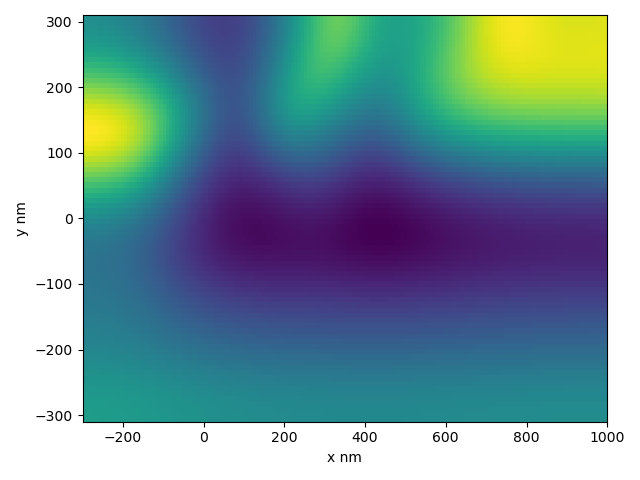

In [14]:
fig, ax = plt.subplots(1)
x=df.coords['x']
y=df.coords['y']
z=df.variables['Gamma']
ax.pcolormesh(x.value,y.value,z.value.T)
ax.set_xlabel(f"{x.name} {x.unit}")
ax.set_ylabel(f"{y.name} {y.unit}")
fig.tight_layout()